we will detects unusual price changes in cryptocurrency data using two methods: a simple statistical approach called Z-score and a machine learning method called Isolation Forest. By combining these methods, we can find more accurate and meaningful anomalies in the price data. This helps understand sudden or unexpected changes in the market.

 1. Z-Score Method (Statistical Approach)
The Z-score method assumes the data follows a normal distribution. It measures how many standard deviations a data point is from the mean.

Steps:

Calculate the mean and standard deviation of the target variable (e.g., closing price).

Compute the Z-score for each data point.

Flag any point with a Z-score above a threshold (commonly 3 or -3) as an anomaly.

2. Isolation Forest (Machine Learning Approach)
Isolation Forest isolates anomalies by randomly partitioning the data. Anomalies are more likely to be isolated earlier.

Steps:

Train the Isolation Forest model on the relevant features (e.g., closing price).

The model returns a prediction: -1 for anomaly, 1 for normal.

Combine with Z-score results for more robust detection.

3. Combining Both Methods
We only consider a point an anomaly if either:

It has a high Z-score (beyond ±3), or

It is flagged by Isolation Forest as -1.

This helps us detect both statistically unusual and structurally strange values.

/tmp/ipykernel_10238/931896019.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2022-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


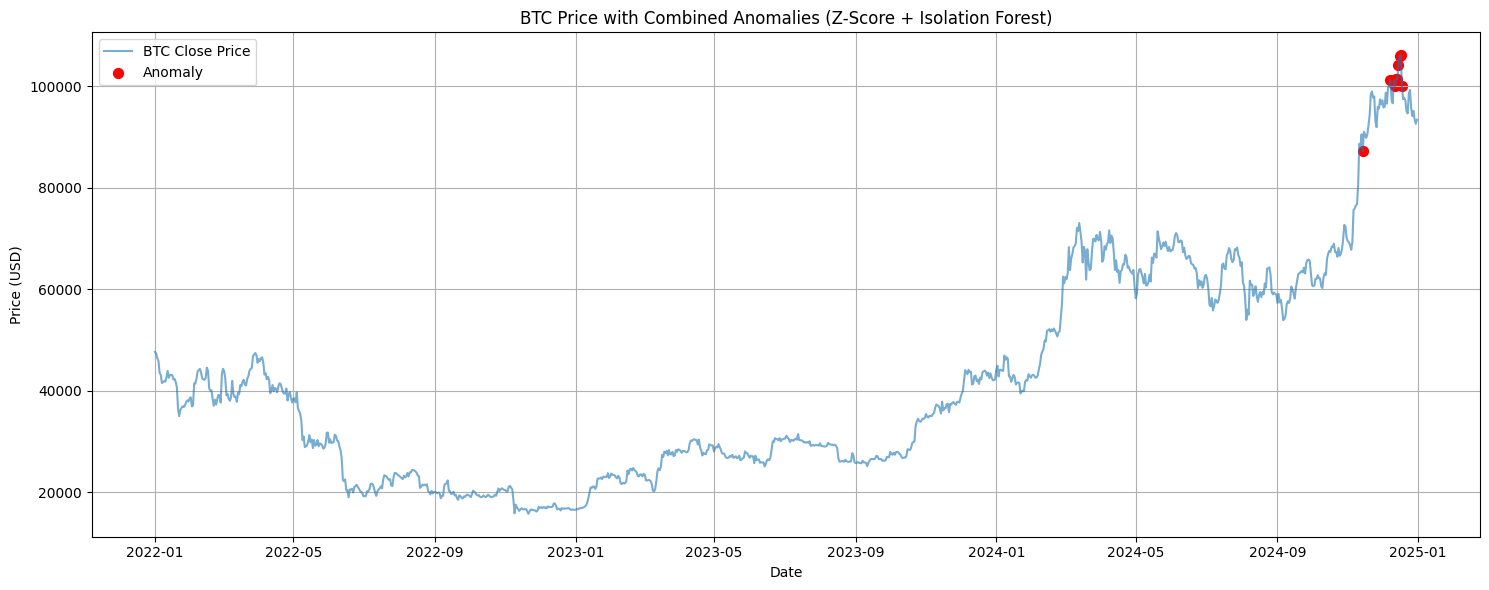

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Download crypto data
btc = yf.download("BTC-USD", start="2022-01-01", end="2025-01-01")
btc = btc[['Close']].dropna()

#  Calculate Z-scores
btc['z_score'] = (btc['Close'] - btc['Close'].mean()) / btc['Close'].std()
btc['z_anomaly'] = btc['z_score'].abs() > 3

# Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
btc['iso_anomaly'] = iso.fit_predict(btc[['Close']])
btc['iso_anomaly'] = btc['iso_anomaly'] == -1  

# Combine both methods
btc['combined_anomaly'] = btc['z_anomaly'] | btc['iso_anomaly']

# Visualize results
plt.figure(figsize=(15, 6))
plt.plot(btc.index, btc['Close'], label='BTC Close Price', alpha=0.6)
plt.scatter(btc.index[btc['combined_anomaly']], 
            btc['Close'][btc['combined_anomaly']], 
            color='red', label='Anomaly', s=50)
plt.title('BTC Price with Combined Anomalies (Z-Score + Isolation Forest)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# Save anomalies to CSV

# Create a DataFrame with only anomalies (where combined_anomaly is True)
anomalies_combined = btc[btc['combined_anomaly']].copy()

# Reset index to turn the datetime index into a column
anomalies_combined.reset_index(inplace=True)

# Optionally rename the datetime column to 'Date' for clarity
anomalies_combined.rename(columns={'index': 'Date'}, inplace=True)

# Save to CSV with dates and all columns
anomalies_combined.to_csv("detected_anomalies.csv", index=False)


2025-08-12 15:30:02.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:30:02.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:30:02.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:30:02.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:30:02.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:30:02.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:30:02.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:30:02.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

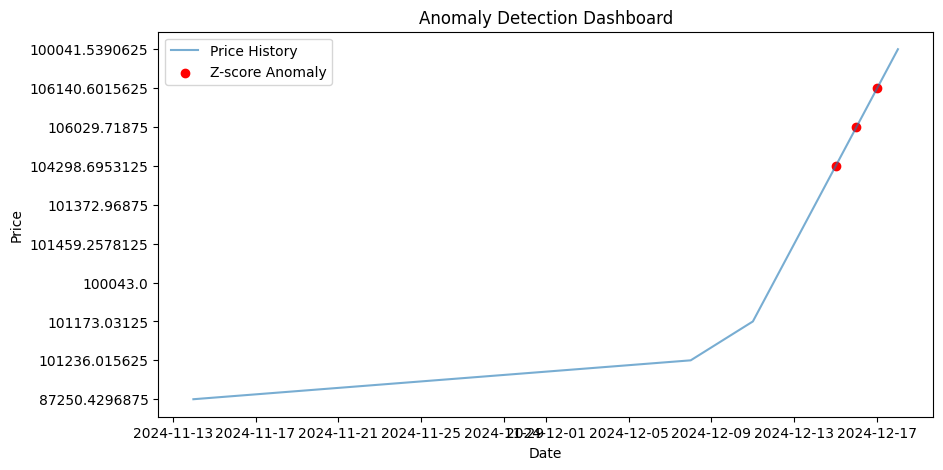

In [5]:
filtered_df

,Date,Close,z_score,z_anomaly,iso_anomaly,combined_anomaly
1,2024-11-14,87250.4296875,2.228766,False,True,True
2,2024-12-08,101236.015625,2.903154,False,True,True
3,2024-12-11,101173.03125,2.900117,False,True,True
4,2024-12-12,100043.0,2.845626,False,True,True
5,2024-12-13,101459.2578125,2.913919,False,True,True
6,2024-12-14,101372.96875,2.909758,False,True,True
7,2024-12-15,104298.6953125,3.050837,True,True,True
8,2024-12-16,106029.71875,3.134307,True,True,True
9,2024-12-17,106140.6015625,3.139654,True,True,True
10,2024-12-18,100041.5390625,2.845556,False,True,True
